# Homework 3

## Problem 1

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import random as random
np.random.seed(42)

### Generate randomized data

We have two features for each segment of data: $x_1$ and $x_2$.    
$x_1 = \{$Some value on the interval $ [0,1)\} \,\,\,\,\,\, x_2 = w*x_1+b+n*(-1)^c$    
Where $n = \{$Some value randomly sampled from a normal distribution of properties $\mu$ and $\sigma\}$ and, $b$ and $w$ are passed as inputs.    
We then compute $m$ of these segments to generate an entire set of randomized data.

In [0]:
# Generates randomized data according to functions
# and given input parameters.
def get_random_data(w, b, mu, sigma, m):
  data = []
  labels = np.random.randint(2, size=m)

  for i in range(m):
    c = labels[i]
    n = np.random.normal(mu, sigma)

    # The functions used
    x_1 = random.random()
    x_2 = w * x_1 + b + ((-1)**c) * n

    data.append([x_1, x_2])
  
  data = np.array(data)
  return data, labels

# The input parameters for the generated data.
truth_weight = 40
truth_bias = 30
truth_mu = 25
truth_sigma = 7
truth_m = 10000

# Generate the randomized data.
data, labels =  get_random_data(truth_weight, truth_bias, truth_mu, truth_sigma, truth_m)

### Display randomized data

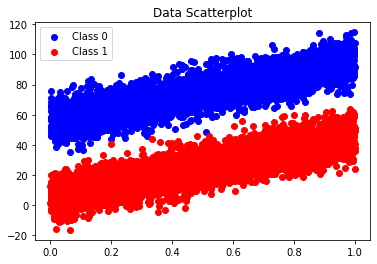

In [0]:
# Displays randomized data in a scatterplot.
def display_random_data(data, labels):
    x_red = []
    y_red = []
    x_blue = []
    y_blue = []

    # Sort and convert data parsable by matplotlib.
    for i in range(len(labels)):
        if labels[i] == 0:
            x_blue.append(data[i][0])
            y_blue.append(data[i][1])
        else:
            x_red.append(data[i][0])
            y_red.append(data[i][1])
    
    # Plot sorted data.
    plt.scatter(x_blue, y_blue, c='blue', label='Class 0')
    plt.scatter(x_red, y_red, c='red', label='Class 1')

    # Configure the plot.
    plt.legend()
    plt.title('Data Scatterplot')

# Display the generated data.
display_random_data(data, labels)
plt.show()

### Divide the randomized data

In [0]:
# Divide up the data into testing and training sets.
training_data = data[:7999]
training_labels = labels[:7999]
testing_data = data[8000:]
testing_labels = labels[8000:]

## Problem 2

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Activation

### Network input parameters

In [0]:
# Network input parameters.
input_dim = 2
output_dim = 1
batch_size = 128
epochs = 250

### Network architecture

In [0]:
# Build the model.
model = Sequential()
model.add(Dense(output_dim, input_dim=input_dim, activation='sigmoid'))

### Network training

In [0]:
# Train the model.
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(training_data, training_labels, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(testing_data, testing_labels))
score = model.evaluate(testing_data, testing_labels, verbose=0)

# Display the results.
print('Testing loss:', score[0])
print('Testing accuracy:', score[1])

Epoch 1/250
63/63 [==============================] - 0s 4ms/step - loss: 3.8784 - accuracy: 0.5129 - val_loss: 3.5236 - val_accuracy: 0.5075
Epoch 2/250
63/63 [==============================] - 0s 2ms/step - loss: 3.0482 - accuracy: 0.5134 - val_loss: 2.6886 - val_accuracy: 0.5095
Epoch 3/250
63/63 [==============================] - 0s 2ms/step - loss: 2.2360 - accuracy: 0.5154 - val_loss: 1.8685 - val_accuracy: 0.5105
Epoch 4/250
63/63 [==============================] - 0s 2ms/step - loss: 1.4464 - accuracy: 0.5183 - val_loss: 1.0926 - val_accuracy: 0.5170
Epoch 5/250
63/63 [==============================] - 0s 2ms/step - loss: 0.7969 - accuracy: 0.5389 - val_loss: 0.6364 - val_accuracy: 0.5705
Epoch 6/250
63/63 [==============================] - 0s 2ms/step - loss: 0.6200 - accuracy: 0.5903 - val_loss: 0.6149 - val_accuracy: 0.5935
Epoch 7/250
63/63 [==============================] - 0s 2ms/step - loss: 0.6018 - accuracy: 0.6136 - val_loss: 0.5969 - val_accuracy: 0.6080
Epoch 8/250
6

In [0]:
# Extract weights and bias from layer.
dense_layer = model.layers[0]
weights, bias = dense_layer.get_weights()

# Redefine weights and bias.
w_1 = weights[0]
w_2 = weights[1]
b_1 = bias

### Plotting predictions

Since we generate the data from known inputs and a certain formula, we know the true separating line of the network. That is, $y_t = x*w_t+b_t$. We can now compare the true separating line of the network with the predicted separating line of the network. This can be found using the outputs of the trained network with $y_p = x*\frac{-w_1}{w_2}+\frac{-b_1}{w_2}$.

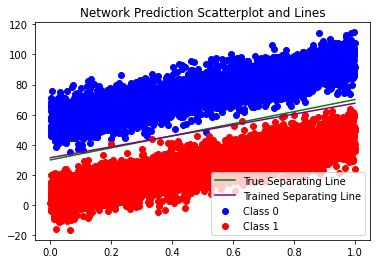

In [0]:
# Creates a scatterplot of randomized data and
# plots true and predicted separating lines
# for a given input of weights and a bias.
def plot_predictions(b_1, w_1, w_2):
    # Get a scatterplot of our random data.
    display_random_data(data, labels)

    # Calculate the y values.
    x = np.linspace(0, 1)
    y_truth = x * truth_weight + truth_bias
    y_pred = x * (-w_1 / w_2) + (-b_1 / w_2)

    # Plot the functions.
    plt.plot(x, y_truth, c='green', label='True Separating Line')
    plt.plot(x, y_pred, c='purple', label='Trained Separating Line')

    # Configure the plot.
    plt.title('Network Prediction Scatterplot and Lines')
    plt.legend()
    plt.show()

# Plot the predictions of the trained keras network.
ax = plt.gca()
plot_predictions(b_1, w_1, w_2)

# Save the y limits for future reference.
plt_pred_ylim = ax.get_ylim()

### Plotting the heatmap

In order to create a heatmap, we need to find an equation $f : R^2 \rightarrow R$ where the input is the axes and the output is the 'heat' value. Understanding and utilizing the weights and bias from our trained network, we can construct the formula $z = w_1*x+w_2*y+b$ where $x$ and $y$ are the axes inputs and $w_1$, $w_2$, and $b$ are the weights and bias.

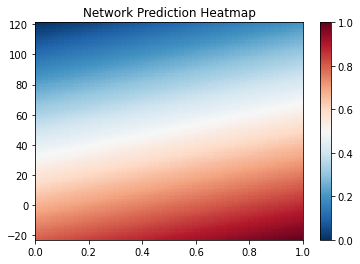

In [0]:
# Creates a heatmap of a network with
# a given input of its weights and bias.
def plot_heatmap(ylim, b_1, w_1, w_2):
    # Define the boundaries of the heatmap.
    y, x = np.meshgrid(np.linspace(ylim[0], ylim[1], 100), np.linspace(0, 1, 100))

    # Define our z function, the heatmap color.
    z = w_1 * x + w_2 * y + b_1

    # Normalize z to a [0,1] interval.
    z_min, z_max = z.min(), z.max()
    z_range = abs(z_max) + abs(z_min)
    z = (z + abs(z_min)) / z_range

    # Define a subplot for a colorbar.
    fig, ax = plt.subplots()

    # Define the color mapping for the heatmap.
    c = ax.pcolormesh(x, y, z, cmap='RdBu_r', vmin=0, vmax=1)
    ax.axis([x.min(), x.max(), y.min(), y.max()])
    fig.colorbar(c, ax=ax)

    # Configure the plot.
    plt.title('Network Prediction Heatmap')
    plt.show()

# Plot the heatmap of the trained keras network.
plot_heatmap(plt_pred_ylim, b_1, w_1, w_2)

## Problem 3

### Network input parameters

In [0]:
# Network input parameters.
epochs = 250
lr = 0.01

### Stochastic gradient logistic regression

##### Sigmoid function

The sigmoid function is used in stochastic gradient logistic regression. It is defined as $\sigma(z)=\frac{1}{1+e^{-z}}$.

In [0]:
# Performs the sigmoid function.
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

##### Network training

In [0]:
# Initialization of network weights and bias.
w_1 = np.random.randn(1)
w_2 = np.random.randn(1)
b_1 = np.zeros(1)

In order to train the network, some steps need to be taken. We iterate through each epoch, continually updating the weights and the bias through a form of gradient descent.    
    
Gradient descent in the code here, includes three important formulas.    
First, the $y_p = w_1 * x_1 + w_2 * x_2 + b_1$ formula is realized to find a prediction given certain input values $x_1$ and $x_2$. Once calculated, $y_p$ is used as input to the sigmoid function $a = \sigma(z)$.    
Next, $a$ is used as input to gradient descent formulas such as $g_{w1} = (a - y) * x_1$.    
Lastly, gradients are used as input to 'descent' formulas such as $w_1 = w_1 - LR * g_{w1}$.

Afterwards, we'd like to know how accurate the model is and so we pass on the resulting $w_1$, $w_2$, and $b_1$ values to be evaluated.

In [0]:
# Training a stochastic gradient logistic regression model.
for epoch in np.arange(epochs):
    print("Epoch " + str(epoch+1) + "/" + str(epochs))

    # Iterate through all features.
    for i in np.arange(len(training_data)):
        # Calculate predictions.
        y_pred = w_1 * training_data[i][0] + w_2 * training_data[i][1] + b_1
        a = sigmoid(y_pred)
        
        # Perform gradient descent.
        grad_w_1 = (a - training_labels[i]) * training_data[i][0]
        grad_w_2 = (a - training_labels[i]) * training_data[i][1]
        grad_b_1 = (a - training_labels[i])
        
        # Apply to weights and bias.
        w_1 -= lr * grad_w_1
        w_2 -= lr * grad_w_2
        b_1 -= lr * grad_b_1

Epoch 1/250
Epoch 2/250
Epoch 3/250
Epoch 4/250
Epoch 5/250
Epoch 6/250
Epoch 7/250
Epoch 8/250
Epoch 9/250
Epoch 10/250
Epoch 11/250
Epoch 12/250
Epoch 13/250
Epoch 14/250
Epoch 15/250
Epoch 16/250
Epoch 17/250
Epoch 18/250
Epoch 19/250
Epoch 20/250
Epoch 21/250
Epoch 22/250
Epoch 23/250
Epoch 24/250
Epoch 25/250
Epoch 26/250
Epoch 27/250
Epoch 28/250
Epoch 29/250
Epoch 30/250
Epoch 31/250
Epoch 32/250
Epoch 33/250
Epoch 34/250
Epoch 35/250
Epoch 36/250
Epoch 37/250
Epoch 38/250
Epoch 39/250
Epoch 40/250
Epoch 41/250
Epoch 42/250
Epoch 43/250
Epoch 44/250
Epoch 45/250
Epoch 46/250
Epoch 47/250
Epoch 48/250
Epoch 49/250
Epoch 50/250
Epoch 51/250
Epoch 52/250
Epoch 53/250
Epoch 54/250
Epoch 55/250
Epoch 56/250
Epoch 57/250
Epoch 58/250
Epoch 59/250
Epoch 60/250
Epoch 61/250
Epoch 62/250
Epoch 63/250
Epoch 64/250
Epoch 65/250
Epoch 66/250
Epoch 67/250
Epoch 68/250
Epoch 69/250
Epoch 70/250
Epoch 71/250
Epoch 72/250
Epoch 73/250
Epoch 74/250
Epoch 75/250
Epoch 76/250
Epoch 77/250
Epoch 78

### Network testing/evaluation

In evaluation, we iterate through all testing data and use the given features, foreign to the network and determine how the network classifies them. There are two common benchmarks to reflect this: testing accuracy and testing loss.    
    
Testing accuracy can be calculated by finding the $y_p$ and $\sigma(z)$ formulas. They are used to determine classification. If $a >= \frac{1}{2}$, the network believes the features belong to class 1. If $a < \frac{1}{2}$, the network believes the features belong to class 0. Then we check whether or not the network's classification holds up against the true classification $y$. Doing this for each iteration, gives us the testing accuracy.

Testing loss is dependent on the loss function. The loss function we are using is binary cross entropy loss which is the function $\mathcal{L}_{ce} = -y * log(a) - (1 - y) * log(1 - a)$ where $a = \sigma(y_p)$ and $y$ is the true classification. The loss is added with each iteration and eventually divided by the quantity of testing data that was iterated through.

In [0]:
testing_loss = 0
testing_accuracy = 0

# Iterate through all features.
for i in np.arange(len(testing_data)):
    # Calculate predictions.
    y_pred = w_1 * testing_data[i][0] + w_2 * testing_data[i][1] + b_1
    a = sigmoid(y_pred)
    y = testing_labels[i]

    # Determine accuracy.
    if a >= 0.5:
        if y == 1:
            testing_accuracy += 1
    else:
        if y == 0:
            testing_accuracy += 1
    
    # Apply testing loss with binary cross entropy.
    testing_loss += (-y * np.log(a) - (1 - y) * np.log(max(1 - a, 0.0000001)))[0]

testing_loss /= len(testing_data)
testing_accuracy /= len(testing_data)

# Display the results.
print('Testing loss:', testing_loss)
print('Testing accuracy:', testing_accuracy)

Testing loss: 0.0003052547330755031
Testing accuracy: 1.0


### Plotting predictions

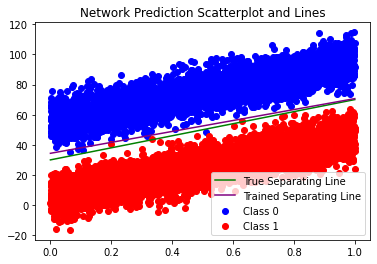

In [0]:
# Plot predictions of the custom stochastic gradient
# logistic regression model.
ax = plt.gca()
plot_predictions(b_1, w_1, w_2)

# Save the y limits for future reference.
plt_pred_ylim = ax.get_ylim()

### Plotting the heatmap

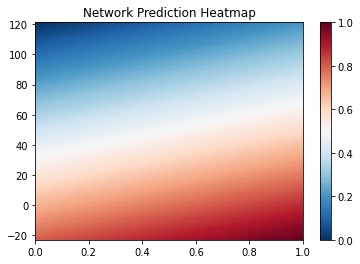

In [0]:
# Plot heatmap of the custom stochastic gradient
# logistic regression model.
plot_heatmap(plt_pred_ylim, b_1, w_1, w_2)

# Sources

- https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.scatter.html
- https://www.science-emergence.com/Articles/How-to-create-a-scatter-plot-with-several-colors-in-matplotlib-/
- https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.randint.html
- https://stackoverflow.com/questions/30030659/in-python-what-is-the-difference-between-random-uniform-and-random-random
- https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/scatter_with_legend.html
- https://medium.com/@the1ju/simple-logistic-regression-using-keras-249e0cc9a970
- https://stackoverflow.com/questions/43715047/how-do-i-get-the-weights-of-a-layer-in-keras
- https://stackoverflow.com/questions/33282368/plotting-a-2d-heatmap-with-matplotlib/54088910#54088910
- https://matplotlib.org/api/_as_gen/matplotlib.pyplot.title.html
- https://github.com/schneider128k/machine_learning_course/blob/master/slides/logistic_regression.pdf
- https://colab.research.google.com/drive/1ZKa5sIiSgS8P1RuNyH6yYcZ6F9S7Yiwu
- https://stackoverflow.com/questions/26131607/matplotlib-get-ylim-values